## Proyecto 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Nodo:
    #Inicializamos los atributos de la clase
    def __init__(self, vecinos, estado):
        self.vecinos = np.array(vecinos,dtype=np.int32)
        self.estado = estado
    #Métodos de la clase
    def AddNodo(self,ni): #Añade una conexión al nodo
        if(ni not in self.vecinos):
            self.vecinos=np.append(self.vecinos,ni)
        return False
    def GetNumVecinos(self): #Cuenta el número de vecinos del nodo
        return np.size(self.vecinos)

In [8]:
#Creamos una red de Krapivski, Redner y Leyvraz
class RedEP:
    #Inicializamos los atributos de la clase
    def __init__(self, Nt,alph):
        self.Nt=Nt
        self.nd = []
        self.alph=alph
        for i in range(self.Nt):
            self.nd.append(Nodo([],0))
        #self.nd[1].AddNodo(0)
        #self.nd[0].AddNodo(1)
        for i in range(self.Nt):
            j=self.EnlacePreferencial(i,alph)
            self.nd[i].AddNodo(j)
            self.nd[j].AddNodo(i)
    #Métodos de la  red       
    def EnlacePreferencial(self,N,alph):
        j=0
        F=np.zeros(N+1)
        s=0
        for t in range(N):
            s+=(self.nd[t].GetNumVecinos())**alph
        F[0]=0
        for  t in range(1,N+1):
            F[t]+=F[t-1]+(1.0*self.nd[t-1].GetNumVecinos())**alph/s
        x=np.random.rand()
        for t in range(N):
            if(F[t]<x and x<=F[t+1]):
                j=t
        return j
    
    def GeneraPK(self):
        P=np.zeros(self.Nt)
        kmax=0
        for i in range(self.Nt):
            k=self.nd[i].GetNumVecinos()
            if(k>kmax):
                kmax=k
            P[k]+=1
        return P,kmax
    def GuardaRed(self,file):
        f=open("f:/OneDrive/Clases UNAM/Complejos/Tarea3/"+file+".tgf", 'w+')
        for i in range(self.Nt):
            f.write(str(i)+"\t"+str(i)+"\n")
        f.write("#\n")
        for i in range(self.Nt):
            k=self.nd[i].GetNumVecinos()
            for j in range(k):
                iv=self.nd[i].vecinos[j]
                f.write(str(i)+"\t"+ str(iv)+"\n")
        f.close()

In [9]:
##Inciso a, para alpha=0.5
#5000 nodos
red1=RedEP(5000,0.5)
red1.GuardaRed("alpha05")

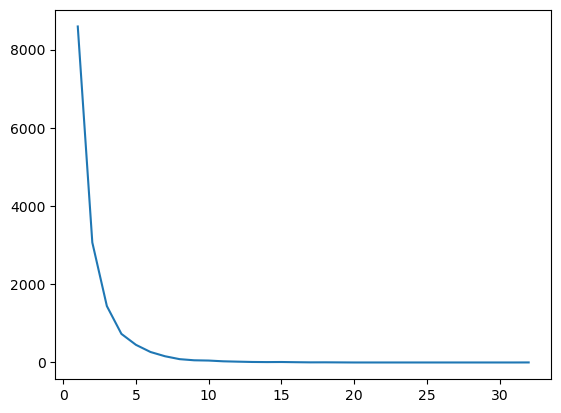

In [10]:
#15000 nodos
red2=RedEP(15000,0.5)
Pk,kmax=red2.GeneraPK()
xplot=range(red2.Nt)
fig,ax=plt.subplots()
plt.plot(xplot[1:kmax+1],Pk[1:kmax+1])
plt.savefig('PK05.pdf')

In [11]:
##Para alpha=1
#5000 nodos
red_=RedEP(5000,1.0)
red_.GuardaRed("alpha10")

In [12]:
##Inciso a, para alpha=1.5
#5000 nodos
red3=RedEP(5000,1.5)
red3.GuardaRed("alpha15")

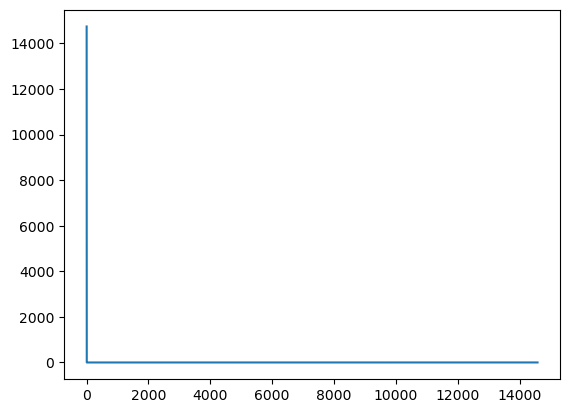

In [13]:
#15000 nodos
red4=RedEP(15000,1.5)
Pk,kmax=red4.GeneraPK()
xplot=range(red4.Nt)
fig,ax=plt.subplots()
plt.plot(xplot[1:kmax+1],Pk[1:kmax+1])
plt.savefig('PK15.pdf')